# ICD - Projeto Final: Fatores que influenciam a vitória em League of Legends

## By:

     André Luiz Morato Barreto - 2020054170
     
     Matheus Marchesotti Dutra Ferraz - 2019007015

     Lucas Mesquita Andrade - 2020054668

     Victor Augusto de Lima Cruz - 2020054854
     
## External info:
    
    Link Video: 
    
    Github: https://github.com/VictorAugustoqwe/TP_ICD


Esse relatório analisará os dados que já foram filtrados por outro dos notebooks presentes na pasta dados.
Além disso, todos os notebooks utilizados para gerar os resultados aqui podem ser encontrados na mesma pasta.

# Introdução

Neste trabalho é feita uma análise de diferentes características de uma partida que podem influenciar a vitória de um time, algumas das quais não deveriam ter nenhum impacto significativo nas taxas de vitória.

# Motivação

A motivação pelo trabalho se dá pela importância que uma vitória pode ter no jogo eletrônico League of Legends, da empresa Riot Games, o qual está há anos nos 5 jogos mais jogados do mundo por número de jogadores mensais. O último campeonato mundial teve uma premiação de US$ 2,25 milhões, número que demonstra um pouco a seriedade e competitividade do jogo.

Além da premiação direta por ganhar o campeonato, as equipes participantes e suas organizações também conseguem gerar receita por meio da venda de camisetas e outros itens com a estampa do time, o que está ligado à performance do time nos campeonatos dos quais participa.

Outro ponto relevante é o crescimento dos sites de apostas, no Brasil em especial o "Sportsbet", no qual uma pessoa que conseguir prever bem o resultado de uma partida consegue ganhar bastante dinheiro.

# Perguntas

1 - O lado no qual cada time joga no mapa tem influência na vitória?

2 - A região da qual o time origina tem influência na vitória no campeonato mundial?

3 - Os campeões mais escolhidos são os campeões que possuem as maiores taxas de vitória?

# Dados Utilizados

Para a realização deste projeto, foi utilizado apenas uma base de dados, que contém diversas informações sobre partidas oficiais de League of Legends.

### League of Legends official matches data: 2015-2018
**Descrição:** Conjunto de dados contendo informações sobre partidas em campeonatos oficiais de League of Legends em diversas regiões do planeta. Inclui informações sobre o resultado da partida, sua duração, a sigla do campeonato, o nome dos times competindo, o apelido dos jogadores que participaram de cada partida, seus respectivos campeões escolhidos, entre outras.

**Fonte:** [League of Legends Competitive matches, 2015 to 2018](https://www.kaggle.com/chuckephron/leagueoflegends)

# Limpeza dos Dados

A limpeza feita retirou algumas informações consideradas desnecessárias para a análise, que inclui a remoção das colunas relacionadas ao ouro adquirido, aos monstros abatidos e às estruturas destruídas por cada equipe. Além disso, foram criadas duas novas colunas que contém a respectiva sigla da liga regional da qual cada equipe se origina.

# Imports e definições iniciais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [ ]:
leagueoflegends = pd.read_csv('/content/drive/MyDrive/LolDatabase/Dataframe_Filtrado.csv',header=0)
winrates = pd.read_csv('/content/drive/MyDrive/LolDatabase/Winrates.csv',header=0)

In [ ]:
leagueoflegends.head()

,League,Year,Season,Type,blueTeamLeague,blueTeamTag,bResult,rResult,redTeamTag,redTeamLeague,gamelength,blueTop,blueTopChamp,blueJungle,blueJungleChamp,blueMiddle,blueMiddleChamp,blueADC,blueADCChamp,blueSupport,blueSupportChamp,blueBans,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,redBans
0,NALCS,2015,Spring,Season,NALCS,TSM,1,0,C9,NALCS,40,Dyrus,Irelia,Santorin,RekSai,Bjergsen,Ahri,WildTurtle,Jinx,Lustboy,Janna,"['Rumble', 'Kassadin', 'Lissandra']",Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,"['Tristana', 'Leblanc', 'Nidalee']"
1,NALCS,2015,Spring,Season,NALCS,CST,0,1,DIG,NALCS,38,Cris,Gnar,Impaler,Rengar,Jesiz,Ahri,Mash,Caitlyn,Sheep,Leona,"['Kassadin', 'Sivir', 'Lissandra']",Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,"['RekSai', 'Janna', 'Leblanc']"
2,NALCS,2015,Spring,Season,NALCS,WFX,1,0,GV,NALCS,40,Flaresz,Renekton,ShorterACE,Rengar,Pobelter,Fizz,Altec,Sivir,Gleeb,Annie,"['JarvanIV', 'Lissandra', 'Kassadin']",Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,"['Leblanc', 'Zed', 'RekSai']"
3,NALCS,2015,Spring,Season,NALCS,TIP,0,1,TL,NALCS,41,Rhux,Irelia,Rush,JarvanIV,XiaoWeiXiao,Leblanc,Apollo,Sivir,Adrian,Thresh,"['Annie', 'Lissandra', 'Kassadin']",Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,"['RekSai', 'Rumble', 'LeeSin']"
4,NALCS,2015,Spring,Season,NALCS,CLG,1,0,T8,NALCS,35,Benny,Gnar,Xmithie,JarvanIV,Link,Lissandra,Doublelift,Tristana,aphromoo,Janna,"['Irelia', 'Pantheon', 'Kassadin']",CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,"['Rumble', 'Sivir', 'Rengar']"


# Análise Exploratória

Nessa parte fazemos uma caracterização inicial dos dados, junto com algumas visualizações que são pertinentes para as análises realizadas.

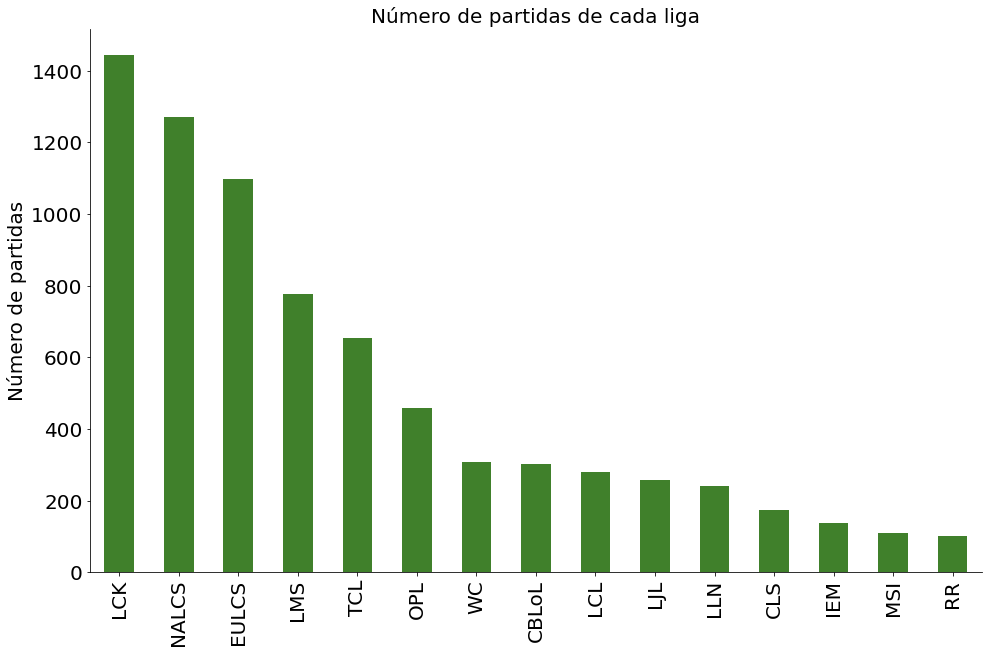

In [ ]:
plot = leagueoflegends['League'].value_counts().plot.bar(color='#40802b')
plot.set_title('Número de partidas de cada liga')
plot.set_ylabel('Número de partidas')
despine()

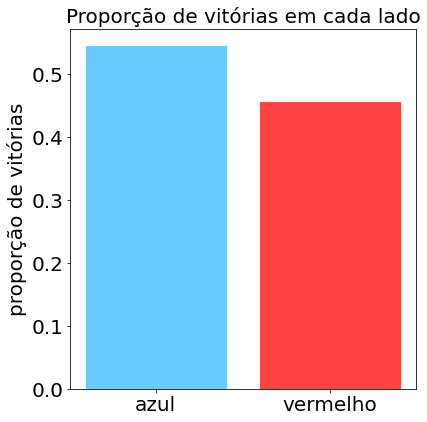

In [ ]:
resultados = leagueoflegends[['bResult','rResult']]
azuis = leagueoflegends[leagueoflegends['bResult'] == 1]
vermelhos = leagueoflegends[leagueoflegends['rResult'] == 1]
jogos = len(leagueoflegends)
azuis = azuis['bResult'].sum() / jogos
vermelhos = vermelhos['rResult'].sum() / jogos

fig = plt.figure()
ax = fig.add_axes([0,0,0.3,0.5])
langs = ['azul', 'vermelho']
students = [azuis, vermelhos]
bar = ax.bar(langs, students, width=0.8)

ax.set_ylabel('proporção de vitórias')
ax.set_title('Proporção de vitórias em cada lado')

bar[0].set_color('#68cbfc')
bar[1].set_color('#ff4242')
plt.show()

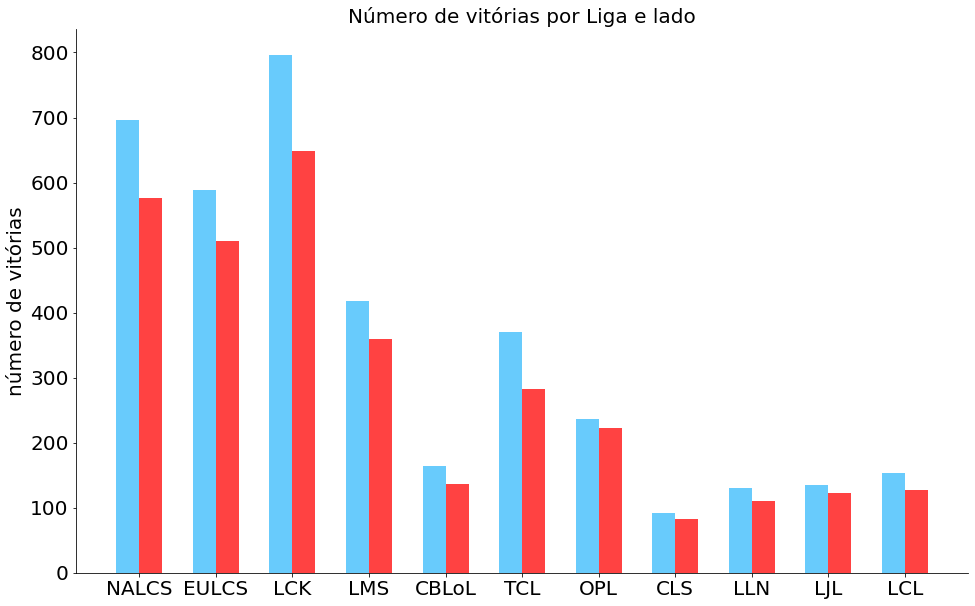

In [ ]:
#PLOTAR VITORIAS POR LADO POR REGIÃO TIRAR MSI WC RR E IEM
ligas = leagueoflegends['League'].unique()
regioes = ligas[:-4]
vit_azuis = []
vit_vermelhas = []
for regiao in regioes:
  jogos = leagueoflegends[leagueoflegends['League'] == regiao]
  soma = jogos[['bResult','rResult']].sum()
  vit_azuis.append(soma['bResult'])
  vit_vermelhas.append(soma['rResult'])
vit_azuis = np.array(vit_azuis)
vit_vermelhas = np.array(vit_vermelhas)

width = 0.30  # the width of the bars

#Comparando entre Random forest
fig, ax = plt.subplots()
x = np.arange(len(regioes))

azul = ax.bar(x - 1/2*width, vit_azuis, width, label='azul', color='#68cbfc')
vermelho = ax.bar(x + 1/2*width, vit_vermelhas, width, label='vermelho', color='#ff4242')

ax.set_ylabel('número de vitórias')
ax.set_title('Número de vitórias por Liga e lado')
ax.set_xticks(x)
ax.set_xticklabels(regioes)

despine()

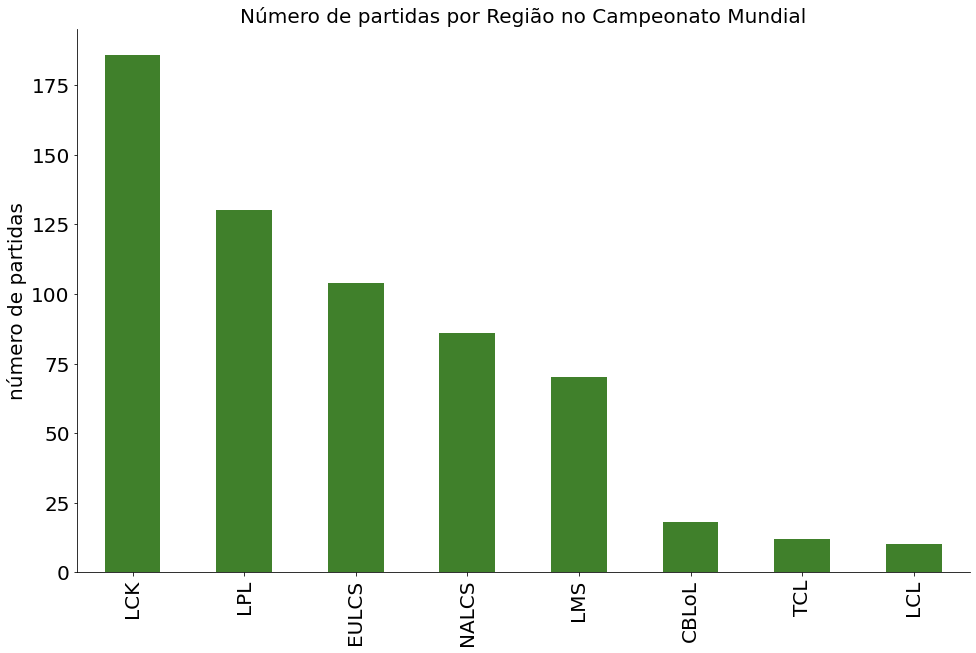

In [ ]:
#PLOTAR NÚMERO DE JOGOS POR LIGA NO MUNDIAL (WC)
WC = leagueoflegends[leagueoflegends['League'] == 'WC']
League_WC_game = pd.concat([WC['blueTeamLeague'],WC['redTeamLeague']])
ax = League_WC_game.value_counts().plot.bar(color='#40802b')
ax.set_ylabel('número de partidas')
ax.set_title('Número de partidas por Região no Campeonato Mundial')
despine()

# Testes de Hipótese

Fazer testes de hipótese para todos, e para cada liga<br>
H0: Lado não afeta quem vence - proporção = 0.5<br>
H1: Lado afeta quem vence - proporção ≠ 0.5

In [ ]:
# gerar um intervalo de confiança para a taxa de vitórias no lado azul, com alpha = 0.05
Blue = leagueoflegends['bResult']
mediaBlue = Blue.sum() / len(leagueoflegends)
desvio = np.std(Blue, ddof=1)
inferior = mediaBlue - 1.96 * desvio / np.sqrt(len(leagueoflegends))
superior = mediaBlue + 1.96 * desvio / np.sqrt(len(leagueoflegends))
print('[%.4f, %.4f]' %(np.round(inferior, 4), np.round(superior,4)))

[0.5329, 0.5553]


In [ ]:
# gerar um intervalo de confiança para a taxa de vitórias no lado azul para cada liga, com alpha = 0.05
ligas = leagueoflegends['League'].unique()
print('liga \t partidas \tintervalo \n')
for liga in ligas:
  Blueliga = leagueoflegends[leagueoflegends['League'] == liga]
  Blue = Blueliga['bResult']
  mediaBlue = Blue.sum() / len(Blueliga)
  desvio = np.std(Blue, ddof=1)
  inferior = mediaBlue - 1.96 * desvio / np.sqrt(len(Blueliga))
  superior = mediaBlue + 1.96 * desvio / np.sqrt(len(Blueliga))
  npartidas = len(Blueliga)
  print(liga,'\t', npartidas, '\t\t[%.4f, %.4f]' %(np.round(inferior, 4), np.round(superior,4)))

liga 	 partidas 	intervalo 

NALCS 	 1272 		[0.5198, 0.5745]
EULCS 	 1099 		[0.5064, 0.5654]
LCK 	 1445 		[0.5252, 0.5765]
LMS 	 778 		[0.5022, 0.5723]
CBLoL 	 301 		[0.4885, 0.6012]
TCL 	 653 		[0.5286, 0.6047]
OPL 	 458 		[0.4695, 0.5611]
CLS 	 175 		[0.4515, 0.5999]
LLN 	 242 		[0.4784, 0.6042]
LJL 	 258 		[0.4622, 0.5843]
LCL 	 281 		[0.4862, 0.6028]
WC 	 308 		[0.5194, 0.6300]
MSI 	 111 		[0.4935, 0.6776]
IEM 	 138 		[0.4674, 0.6340]
RR 	 101 		[0.3774, 0.5731]


Notamos que o primeiro intervalo, considerando todas as partidas não contém o valor 0.50, o que indica que com alta probabilidade a escolha de lado afeta no resultado da partida.
Nos intervalos subsequentes, considerando todas as ligas separadamente, notamos que os intervalos contemplam uma variedade maior de valores. Isso pode ser explicado pela diferença na quantidade de partidas registradas de cada liga.

Nos jogos do mundial fazer o teste de hipótese:<br>
H0: Liga não afeta quem vence - intervalo captura 50% para todas<br>
H1: Liga afeta quem vence - intervalo não captura 50% para todas


In [ ]:
WC = leagueoflegends[leagueoflegends['League'] == 'WC']
WC_league_diff = leagueoflegends[leagueoflegends['blueTeamLeague'] != leagueoflegends['redTeamLeague']]
WC_league_diff = WC_league_diff[['blueTeamLeague','blueTeamTag','bResult','rResult','redTeamTag','redTeamLeague']]
ligasRed = WC['redTeamLeague'].unique()
ligasBlue = WC['blueTeamLeague'].unique()
ligas = np.concatenate([ligasRed, ligasBlue])
ligas = np.unique(ligas)
print('liga \t partidas \tintervalo \n')

for liga in ligas:
  jogosBlue = WC_league_diff[WC_league_diff['blueTeamLeague'] == liga]
  jogosRed = WC_league_diff[WC_league_diff['redTeamLeague'] == liga]
  jogos = pd.concat([jogosBlue['bResult'], jogosRed['rResult']])
  desvio = np.std(jogos, ddof=1)
  media = np.mean(jogos)
  inferior = media - 1.96 * desvio / np.sqrt(len(jogos))
  superior = media + 1.96 * desvio / np.sqrt(len(jogos))
  print(liga,'\t', len(jogos), '\t\t[%.4f, %.4f]' %(np.round(inferior, 4), np.round(superior,4)))

liga 	 partidas 	intervalo 

CBLoL 	 18 		[0.0246, 0.4199]
EULCS 	 104 		[0.3558, 0.5480]
LCK 	 128 		[0.7094, 0.8531]
LCL 	 10 		[0.0799, 0.7201]
LMS 	 70 		[0.2177, 0.4394]
LPL 	 106 		[0.4138, 0.6051]
NALCS 	 86 		[0.3025, 0.5114]
TCL 	 12 		[0.0000, 0.0000]


Notamos que algumas ligas claramente têm o intervalo distante do 0.5, como é o caso da LCK e do CBLoL, o que indica que a influência da liga nesses casos é facilmente observável. Em alguns casos com amostras menores, considerando ligas menos competitivas, o intervalo fica muito grande, e então fica difícil distinguir a influência da liga.

# Regressão Linear

Fazer regressão linear para verificar a natureza da relação entre taxa de escolha e a taxa de vitória dos personagens<br/>
prever quem vai ganhar no mundial com base em lado e liga

LinregressResult(slope=0.14485403605499947, intercept=0.4772994837527812, rvalue=0.11142069148765406, pvalue=0.18998864258363515, stderr=0.10997970356045161)


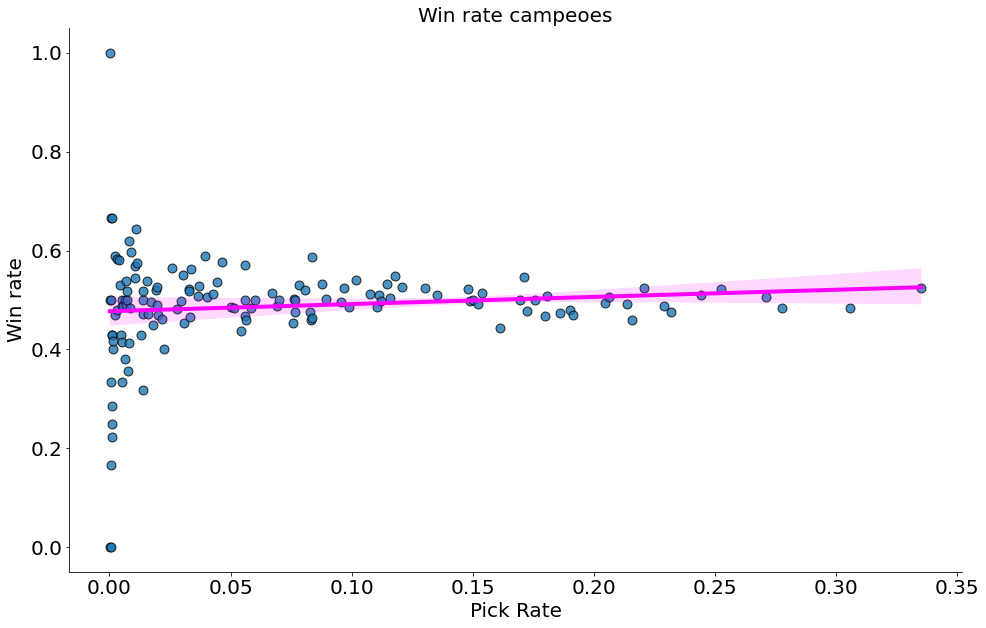

In [ ]:
from scipy import stats as ss

Win = winrates.sort_values(by='npick',ascending=1)

sns.regplot(x='pr', y='wr', data=Win, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.title('Win rate campeoes')
plt.ylabel(r'Win rate')
plt.xlabel(r'Pick Rate')
despine()

print(ss.linregress(Win['pr'], Win['wr']))

Pela regressão, notamos que é difícil fazer essa relação entre taxa de escolhas de um campeão e a taxa de vitórias dele, o que leva a acreditar que possivelmente há fatores que influenciam nas taxas de vitórias de um campeão que não podem ser explicados com os dados disponíveis. <br>
Uma suspeita do grupo é o mecanismo de balanceamento do jogo, que ajusta os status de um personagem para equilibrar as taxas de vitórias. O jogo tende a interferir em mecânicas ou estratégias que são explorados pelos jogadores quando essas levam a taxas de vitórias consideravelmente acima de 50%.

# Classificação

In [ ]:
classificationdf = WC.loc[:,['blueTeamLeague','redTeamLeague','bResult']].copy()
classificationdf.head()

,blueTeamLeague,redTeamLeague,bResult
6391,LPL,LCK,0
6392,NALCS,EULCS,1
6393,TCL,LMS,0
6394,LMS,LPL,0
6395,LCK,LMS,1


In [ ]:
X = classificationdf[['blueTeamLeague','redTeamLeague']]
y = classificationdf['bResult']

X = pd.get_dummies(X)
X = X.values
y = y.values

In [ ]:
X_train, X_final_test, y_train, y_final_test = train_test_split(X,y, test_size=0.2, shuffle = True)
X = X_train
y = y_train

In [ ]:
SPLITS = 5

In [ ]:
kf = KFold(n_splits=SPLITS)
kf.get_n_splits(X)

def realizarKfoldKnn(vizinhos, SPLITS, X, y, kf): 
  f1_knn = []
  model_knn = KNeighborsRegressor(n_neighbors=vizinhos)
  for train_index, test_index in kf.split(X):
    X_treino, X_teste = X[train_index,:], X[test_index,:]
    y_treino, y_teste = y[train_index], y[test_index]
    model_knn.fit(X_treino, y_treino)
    y_predict = model_knn.predict(X_teste).round()
    f1_knn.append(metrics.f1_score(y_teste,y_predict))
  f1_knn = np.array(f1_knn)
  print(f1_knn, f1_knn.mean(), vizinhos)
i = 5
while i < 196:
  realizarKfoldKnn(i, SPLITS, X, y, kf)
  i = i + 5

[0.78481013 0.68421053 0.69565217 0.73015873 0.73239437] 0.7254451846334049 5
[0.74666667 0.64615385 0.64516129 0.75       0.65671642] 0.6889396442107083 10
[0.74666667 0.72       0.69565217 0.75675676 0.61111111] 0.7060373416895155 15
[0.75       0.6031746  0.63492063 0.78787879 0.5625    ] 0.6676948051948053 20
[0.82051282 0.67605634 0.66666667 0.78787879 0.61111111] 0.712445144839511 25
[0.78947368 0.68421053 0.63636364 0.76470588 0.64705882] 0.7043625105544611 30
[0.82051282 0.71052632 0.68493151 0.74285714 0.74358974] 0.7404835059196991 35
[0.81481481 0.71052632 0.66666667 0.73529412 0.73417722] 0.7322958260215775 40
[0.81481481 0.70886076 0.68493151 0.72289157 0.73417722] 0.7331351725225469 45
[0.7804878  0.70886076 0.68493151 0.71794872 0.6835443 ] 0.7151546185934443 50
[0.79518072 0.74074074 0.75294118 0.72289157 0.72941176] 0.7482331942147676 55
[0.79518072 0.73809524 0.75294118 0.76470588 0.6835443 ] 0.7468934647215605 60
[0.77272727 0.73809524 0.75294118 0.72289157 0.6835443

In [ ]:
# melhor resultado
realizarKfoldKnn(105, SPLITS, X, y, kf)

[0.81395349 0.75294118 0.76744186 0.75       0.72941176] 0.762749658002736 105


In [ ]:
kf = KFold(n_splits=SPLITS)
kf.get_n_splits(X)

def realizarLogReg(SPLITS, X, y, kf): 
  f1_lr = []
  model_logreg = LogisticRegression()
  for train_index, test_index in kf.split(X):
    X_treino, X_teste = X[train_index,:], X[test_index,:]
    y_treino, y_teste = y[train_index], y[test_index]
    model_logreg.fit(X_treino, y_treino)
    y_predict = model_logreg.predict(X_teste)
    f1_lr.append(metrics.f1_score(y_teste,y_predict))
  f1_lr = np.array(f1_lr)
  print(f1_lr, f1_lr.mean())

realizarLogReg(SPLITS, X, y, kf)

[0.825      0.68421053 0.70422535 0.76470588 0.71052632] 0.7377336153141761


In [ ]:
kf = KFold(n_splits=SPLITS)
kf.get_n_splits(X)

def realizarRF(p1, p2, SPLITS, X, y, kf): 
  f1_rf = []
  model_rf = RandomForestClassifier(n_estimators=p1,max_depth=p2)
  for train_index, test_index in kf.split(X):
    X_treino, X_teste = X[train_index,:], X[test_index,:]
    y_treino, y_teste = y[train_index], y[test_index]
    model_rf.fit(X_treino, y_treino)
    y_predict = model_rf.predict(X_teste)
    f1_rf.append(metrics.f1_score(y_teste,y_predict))
  f1_rf = np.array(f1_rf)
  print(f1_rf, f1_rf.mean())


realizarRF(50, 2, SPLITS, X, y, kf)
realizarRF(50, 3, SPLITS, X, y, kf)
realizarRF(50, 4, SPLITS, X, y, kf)
realizarRF(50, 5, SPLITS, X, y, kf)

realizarRF(100, 2, SPLITS, X, y, kf)
realizarRF(100, 3, SPLITS, X, y, kf)
realizarRF(100, 4, SPLITS, X, y, kf)
realizarRF(100, 5, SPLITS, X, y, kf)

realizarRF(150, 2, SPLITS, X, y, kf)
realizarRF(150, 3, SPLITS, X, y, kf)
realizarRF(150, 4, SPLITS, X, y, kf)
realizarRF(150, 5, SPLITS, X, y, kf)


[0.81395349 0.75294118 0.76744186 0.75       0.6835443 ] 0.7535761658210532
[0.81481481 0.71604938 0.73684211 0.78947368 0.7012987 ] 0.7516957376606499
[0.81012658 0.71604938 0.73684211 0.74285714 0.71052632] 0.743280305780861
[0.81012658 0.6835443  0.75       0.78947368 0.72      ] 0.7506289140572951
[0.81927711 0.71604938 0.76744186 0.75       0.6835443 ] 0.7472625310824738
[0.825      0.71604938 0.76744186 0.74285714 0.69230769] 0.7487312156692002
[0.825      0.71794872 0.75       0.75       0.7012987 ] 0.7488494838494838
[0.81012658 0.7012987  0.73972603 0.76923077 0.71052632] 0.7461816791989371
[0.82352941 0.71604938 0.76744186 0.75       0.69230769] 0.7498656694507128
[0.81012658 0.71604938 0.73684211 0.74285714 0.7012987 ] 0.7414347828827065
[0.825      0.71794872 0.74666667 0.76923077 0.7012987 ] 0.7520289710289709
[0.825      0.7        0.75       0.78947368 0.72      ] 0.7568947368421052


In [ ]:
#melhor resultado
realizarRF(150, 5, SPLITS, X, y, kf)

[0.825      0.71604938 0.75       0.78787879 0.72      ] 0.7597856341189674


Como visto anteriormente o modelo, dentre os testados e com as escolhas de hiperparâmetros feita, que melhor prevê o resultado é o KNN com 105 vizinhos
e ele obteve um fator F1 de 0.762749658002736.
Para validar o classificador utilizaremos ele para classificar os 20% de teste da base e verificar se o classificador proposto é interessante. 



In [ ]:
def realizarKnn(vizinhos, X, y): 
  model_knn = KNeighborsRegressor(n_neighbors=vizinhos)
  model_knn.fit(X, y)
  return model_knn

model = realizarKnn(105, X, y)
y_predict = model.predict(X_final_test).round()
print(metrics.f1_score(y_final_test,y_predict))

0.7469879518072288


# Conclusão

Partindo de uma suposição com base nos gráficos obtidos na análise exploratória e depois com a realização  dos testes de hipótese e da classificação, concluímos que a região de origem de um time e o lado em que ele joga influenciam na probabilidade de obter uma vitória. O mesmo não pôde ser observado em relação aos campeões selecionados pela equipe. 